**Projektni zadatak iz predmeta Principi prezentacije i prepoznavanje oblika**

Student: Anja Lazarevic, IT 2/2021

# **Segmentacija ultrazvučnih snimaka**

### **Uvod**

---



Cilj ovog projekta je razvoj i implementacija sistema za segmentaciju ultrazvučnih snimaka, koristeći duboke neuronske mreže. Segmentacija je ključni proces u medicinskoj obradi slike, jer omogućava precizno izdvajanje oblasti interesa sa slike, što može pomoći u dijagnostici i praćenju stanja pacijenata. U radu je korišćen model U-Net, koji se pokazao kao vrlo efikasan alat za segmentaciju biomedicinskih slika.

### **Razrada**


---



Segmentacija slike predstavlja proces razdvajanja slike na regije koje sadrže jedinstvene informacije, kao što su tkiva ili patološke promene. Ultrazvučni snimci često sadrže šum i slabu definiciju, što otežava analizu tradicionalnim metodama. Zbog toga se primena dubokih konvolutivnih mreža pokazala kao efikasno rešenje.

**Izbor modela i pristupa**

U-Net arhitektura sastoji se iz dve faze: kompresije (enkodera) koji uči apstraktne karakteristike slike, i dekodera koji rekonstruše dimenzije slike, omogućavajući preciznu lokalizaciju segmentiranih područja.

Za rešavanje zadatka izabrana je UNet arhitektura zbog: njene efikasnosti u medicinskoj segmentaciji, jednostavne implementacije, dobrih rezultata i na manjim skupovima podataka.


Implementacija je urađena u Python-u koristeći PyTorch, a treniranje se vrši u Google Colab okruženju uz korišćenje dostupnog GPU-a, što omogućava bržu obradu i učenje.

**Procena kvaliteta segmentacije**

Koriste se sledeće metrike:


*  IoU (Intersection over Union): meri preklapanje predikcije i stvarne maske, gde se idealna vrednost kreće ka 1.

*  Loss funkcija: najčešće se koristi kombinacija Binary Cross Entropy (BCE) i Dice loss, kako bi se bolje balansirale preciznost i odziv.


Pored metrika, često se koristi i vizuelizacija rezultata – prikaz ulazne slike, stvarne maske i predviđene maske.

**Podaci i priprema**

Korišćeni dataset uključuje ultrazvučne snimke sa pripadajućim binarnim maskama koje definišu ciljne oblasti. Podaci su podeljeni na trening i test skupove. Tokom pripreme, slike i maske su transformisane u standardnu veličinu od 256x256 piksela i pretvorene u tenzore radi lakše obrade od strane modela.



### **Zaključak**


---



Model je uspešno segmentirao ultrazvučne snimke, pokazujući dobar stepen podudarnosti između predviđenih i stvarnih maski. Vrednosti gubitka su se smanjivale tokom epoha, dok je IoU rastao, potvrđujući poboljšanje tačnosti segmentacije.

Segmentacija medicinskih slika predstavlja važan zadatak u modernoj medicinskoj dijagnostici, a UNet model se istakao kao jedno od najefikasnijih rešenja za ovaj problem. Ovaj rad se bavi upravo tim pristupom, i u nastavku će biti detaljno prikazani koraci implementacije, treniranja, evaluacije i prikaza rezultata za zadati skup ultrazvučnih snimaka.


### Reference:
1.   U-Net: Convolutional Networks for Biomedical Image Segmentation
Ronneberger, O., Fischer, P., Brox, T.
2.   V-Net: Fully Convolutional Neural Networks for Volumetric Medical Image Segmentation
Milletari, F., Navab, N., Ahmadi, S.-A.

1.   UNet++: A Nested U-Net Architecture for Medical Image Segmentation
Zhou, Z., Siddiquee, M.M.R., Tajbakhsh, N., Liang, J.
2.   nnU-Net: Self-adapting Framework for U-Net-Based Medical Image Segmentation
Isensee, F., Petersen, J., Kohl, S.A.A., et al.

1.   Deep Learning
Goodfellow, I., Bengio, Y., Courville, A.







# **Koraci u Google Colab okruženju**

Prvo instaliramo biblioteku gdown koja služi za preuzimanje fajlova sa Google Drive-a direktno u Colab. To radimo komandom:

In [1]:
!pip install -U gdown

Zatim, pomoću gdown alata preuzimamo ZIP fajl sa Google Drive-a koristeći njegov URL.

In [2]:
!gdown --fuzzy "https://drive.google.com/file/d/1p8OsKm_zu-pUQmjNeyizFRr_9cZKLsBH/view?usp=sharing" --output Ultrasound_segmentation.zip

Downloading...
From (original): https://drive.google.com/uc?id=1p8OsKm_zu-pUQmjNeyizFRr_9cZKLsBH
From (redirected): https://drive.google.com/uc?id=1p8OsKm_zu-pUQmjNeyizFRr_9cZKLsBH&confirm=t&uuid=06a42dcb-2b01-4ded-8a0a-2edab7de7765
To: /content/Ultrasound_segmentation.zip
100% 2.27G/2.27G [00:33<00:00, 66.8MB/s]


Ovaj deo koda u Google Colab-u raspakuje preuzeti ZIP fajl i njegove podfajlove. Prvo se glavni fajl Ultrasound_segmentation.zip raspakuje u folder /content/dataset. Zatim se zasebno raspakuju train.zip i test.zip u njihove odgovarajuće foldere za trening i test podatke. Tako organizovani podaci olakšavaju kasniju obradu i treniranje modela.

In [3]:
!unzip -o Ultrasound_segmentation.zip -d /content/dataset
!unzip -o /content/dataset/train.zip -d /content/dataset/train
!unzip -o /content/dataset/test.zip -d /content/dataset/test

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/train/34_115_mask.tif  
  inflating: /content/dataset/train/34_116.tif  
  inflating: /content/dataset/train/34_116_mask.tif  
  inflating: /content/dataset/train/34_117.tif  
  inflating: /content/dataset/train/34_117_mask.tif  
  inflating: /content/dataset/train/34_118.tif  
  inflating: /content/dataset/train/34_118_mask.tif  
  inflating: /content/dataset/train/34_119.tif  
  inflating: /content/dataset/train/34_119_mask.tif  
  inflating: /content/dataset/train/34_11_mask.tif  
  inflating: /content/dataset/train/34_12.tif  
  inflating: /content/dataset/train/34_12_mask.tif  
  inflating: /content/dataset/train/34_13.tif  
  inflating: /content/dataset/train/34_13_mask.tif  
  inflating: /content/dataset/train/34_14.tif  
  inflating: /content/dataset/train/34_14_mask.tif  
  inflating: /content/dataset/train/34_15.tif  
  inflating: /content/dataset/train/34_15_mask.tif  
  inflating: /content/data

Na početku projekta, neophodno je učitati sve biblioteke koje će nam biti potrebne za rad. U ovom slučaju, to su biblioteke za obradu podataka, rad sa slikama, vizualizaciju, kao i biblioteke za duboko učenje – konkretno PyTorch i torchvision. Takođe, učitava se i scikit-learn koji se koristi za podelu podataka na trening i validaciju. Bez ovih biblioteka ne bismo mogli da učitamo podatke, obradimo ih i treniramo model.

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
import cv2

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T


Određuje se na kom uređaju će se izvršavati treniranje i evaluacija modela — na GPU-u (ako je dostupan) ili na CPU-u (ako nije)

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Ove linije koda definišu putanje ka različitim delovima dataseta koji se koristi za treniranje i testiranje modela segmentacije.

Prvo, u varijabli DATASET_DIR se nalazi osnovna (glavna) putanja do foldera u kom se nalazi ceo dataset – u ovom slučaju to je /content/dataset, što je standardna lokacija za podatke kada se koristi Google Colab.

Zatim, TRAIN_FOLDER i TEST_FOLDER predstavljaju putanje do posebnih foldera unutar dataset direktorijuma – jedan sadrži slike i maske za treniranje, a drugi slike za testiranje. os.path.join se koristi kako bi se ove putanje formirale na način koji funkcioniše bez obzira na operativni sistem.

Putanja TRAIN_CSV_PATH vodi do .csv fajla koji sadrži informacije o treniranju, tj. listu slika koje imaju maske i koje će se koristiti za obuku modela.

Na kraju, SAMPLE_SUB_PATH ukazuje na fajl koji se koristi kao šablon za format predikcija koje ćemo generisati na test skupu – ovaj fajl je koristan za kreiranje konačnog .csv fajla za predaju rezultata (submission).

In [6]:
DATASET_DIR = "/content/dataset"
TRAIN_FOLDER = os.path.join(DATASET_DIR, "train")
TEST_FOLDER = os.path.join(DATASET_DIR, "test")
TRAIN_CSV_PATH = os.path.join(DATASET_DIR, "train_masks.csv")
SAMPLE_SUB_PATH = os.path.join(DATASET_DIR, "sample_submission.csv")

U ovom delu koda vrši se učitavanje CSV fajlova i priprema podataka za treniranje modela.

Prve dve linije koriste pandas biblioteku za čitanje .csv fajlova koje smo prethodno definisali putem TRAIN_CSV_PATH i SAMPLE_SUB_PATH.

train_df će sadržati informacije o svim trenirajućim uzorcima

sample_df sadrži format koji će se koristiti za predaju konačnih predikcija – on predstavlja praznu šemu (šablon) u koju se kasnije upisuju rezultati segmentacije.

Nakon toga, vrši se kreiranje nove kolone img_id u okviru train_df DataFrame-a.
Ova kolona kombinuje vrednosti iz kolona subject i img, pretvarajući ih u stringove i spajajući ih znakom _.
Na primer, ako je subject = 47, a img = 120, nova vrednost u koloni img_id biće '47_120'. Ovo je korisno jer su slike i maske u folderu sa treniranjem imenovane upravo na taj način – kao 47_120.tif i 47_120_mask.tif. Na ovaj način se obezbeđuje direktna veza između podataka iz tabele i konkretnih fajlova na disku.

In [7]:
train_df = pd.read_csv(TRAIN_CSV_PATH)
sample_df = pd.read_csv(SAMPLE_SUB_PATH)

train_df['img_id'] = train_df['subject'].astype(str) + '_' + train_df['img'].astype(str)


Ovaj deo koda definiše prilagođenu PyTorch klasu UltrasoundDataset, koja nasleđuje klasu Dataset iz biblioteke torch.utils.data. Njena uloga je da omogući pravilno učitavanje i transformisanje slika i maski iz dataset-a kako bi ih model mogao koristiti.

Metoda __init__ : dva glavna parametra koja se prosleđuju  – df i folder. Prvi predstavlja tabelu podataka (obično učitanu iz CSV fajla), koja sadrži informacije o nazivima slika i maski, dok drugi predstavlja putanju do foldera u kojem se te slike i maske nalaze. Pored toga, unutar konstruktora se odmah definišu transformacije koje će se primenjivati na svaku sliku i njenu masku. Prva transformacija konvertuje slike u crno-beli format sa jednim kanalom, što je pogodno za medicinske slike, iako su slike ultrazvuka vec crno-bele i ovo nije neophodno, zbog sigurnosti nije lose ubaciti i ovaj deo koda. Nakon toga, slike se skaliraju na standardnu veličinu od 256x256 piksela, kako bi sve bile jednake dimenzije i kompatibilne za treniranje neuronske mreže. Na kraju, slike se pretvaraju u tenzore, što je format koji PyTorch koristi kao ulaz za modele. Ove transformacije se primenjuju kako bi se obezbedilo da svi podaci budu uniformni i spremni za dalju obradu u procesu treniranja modela.

Metoda __len__ u ovoj klasi ima jednostavnu ulogu – ona vraća broj redova u tabeli podataka (df). Svaki red u toj tabeli odgovara jednoj slici i njenoj maski, pa ova metoda praktično govori PyTorch-u koliko uzoraka se nalazi u našem skupu podataka. Ovo je važno jer omogućava da DataLoader zna koliko puta treba da pozove metodu __getitem__ da bi prošao kroz ceo dataset.

Metoda __getitem__ je ključna za rad sa PyTorch-ovim Dataset klasama, jer se ona poziva svaki put kada želimo da dohvatimo jedan konkretan uzorak iz skupa. Na osnovu prosleđenog indeksa idx, iz tabele se izvlače podaci o nazivu slike – konkretno, ime slike se konstruše iz kolone img_id, što je ranije spojena vrednost subjekta i indeksa snimka (npr. 47_120). Zatim se formiraju pune putanje do slike i njene pripadajuće maske, i obe se učitavaju pomoću PIL.Image. Nakon toga, nad slikom i maskom se primenjuju ranije definisane transformacije – konvertovanje u grayscale, skaliranje na 256×256 i pretvaranje u tenzore. Na kraju, metoda vraća jedan par: sliku i njenu masku, spremne za dalje korišćenje u treniranju modela.

In [8]:
class UltrasoundDataset(Dataset):
    def __init__(self, df, folder, transform=None):
        self.df = df
        self.folder = folder
        self.transform = T.Compose([
    T.Grayscale(),
    T.Resize((256, 256)),
    T.ToTensor()
])


    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_id = self.df.iloc[idx]['img_id']
        img_path = os.path.join(self.folder, f"{img_id}.tif")
        mask_path = os.path.join(self.folder, f"{img_id}_mask.tif")

        image = Image.open(img_path)
        mask = Image.open(mask_path)

        image = self.transform(image)
        mask = self.transform(mask)

        return image, mask


Ovaj kod prikazuje dva nasumična primera iz dataset-a. Za svaki primer se prikazuju: originalna slika, maska i slika sa maskom preklopljenom plavom bojom. Koristi se squeeze() da se uklone višak dimenzija i imshow za prikaz u sivim tonovima i sa transparentnošću. Na kraju se isključuju ose radi lepšeg izgleda.

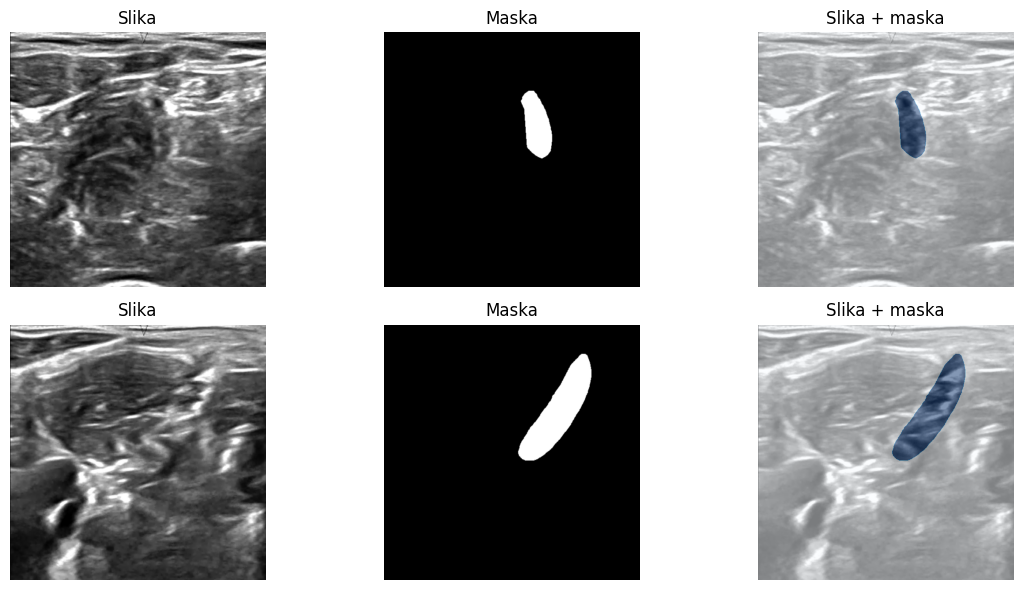

In [9]:
dataset = UltrasoundDataset(train_df, TRAIN_FOLDER)
fig, axs = plt.subplots(2, 3, figsize=(12, 6))

for i in range(2):
    img, mask = dataset[np.random.randint(0, len(dataset))]

    axs[i, 0].imshow(img.squeeze(), cmap="gray")
    axs[i, 0].set_title("Slika")
    axs[i, 1].imshow(mask.squeeze(), cmap="gray")
    axs[i, 1].set_title("Maska")
    axs[i, 2].imshow(img.squeeze(), cmap="gray")
    axs[i, 2].imshow(mask.squeeze(), cmap="Blues", alpha=0.5)
    axs[i, 2].set_title("Slika + maska")

for ax in axs.flatten():
    ax.axis("off")

plt.tight_layout()
plt.show()


Ova klasa ConvolutionBlock definiše jedan osnovni blok konvolucione neuronske mreže koji se sastoji iz tri koraka. Prvo se nad ulazom primenjuje konvolucija (Conv2d) sa zadatim brojem ulaznih i izlaznih kanala, veličinom kernela i pomeranjem (stride), uz padding da se očuva dimenzija. Ovaj sloj primenjuje skup filtera (male matrice) preko slike. Tako prepoznaje lokalne obrasce – ivice, oblike i teksture. Nakon konvolucije ide normalizacija preko BatchNorm2d koja poboljšava stabilnost i ubrzava treniranje. Na kraju, ako je aktivacija uključena (activation=True), rezultat prolazi kroz ReLU funkciju koja uvodi nelinearnost, a ako nije, vraća se direktno bez aktivacije. Ovaj blok je modularan i služi za pravljenje složenijih mrežnih struktura.

In [10]:
class ConvolutionBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, activation=True):
        super().__init__()
        self.activation = activation
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride=stride, padding=kernel_size // 2)
        self.norm = nn.BatchNorm2d(out_channels)

    def forward(self, x):
        x = self.conv(x)
        x = self.norm(x)
        return F.relu(x) if self.activation else x

Ova klasa ResidualBlock ima ulogu da omogući da se informacija iz ulaza direktno prenese ka izlazu. To se postiže tzv. rezidualnim povezivanjem, odnosno dodavanjem originalnog ulaza na transformisani izlaz. Ovaj princip omogućava modelu da uči razliku između ulaza i željenog izlaza, umesto da uči potpuno novu reprezentaciju — što značajno olakšava treniranje dubljih mreža jer ublažava problem nestajanja gradijenata.

Blok prvo normalizuje ulaz sa BatchNorm2d, zatim prolazi kroz ReLU aktivaciju i dva konvoluciona sloja definisana prethodnim ConvolutionBlock (drugi bez aktivacije kako bi sačuvao karakteristike signala koje treba sabrati sa originalnim ulazom). Na kraju se rezultat sabira sa originalnim ulazom (identity), što omogućava mreži da uči razliku (rezidual) između ulaza i izlaza, što poboljšava stabilnost i performanse modela.

In [11]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.norm = nn.BatchNorm2d(in_channels)
        self.conv1 = ConvolutionBlock(in_channels, out_channels)
        self.conv2 = ConvolutionBlock(out_channels, out_channels, activation=False)

    def forward(self, x):
        identity = x
        x = F.relu(x)
        x = self.norm(x)
        x = self.conv1(x)
        x = self.conv2(x)
        return x + identity

Ova klasa DeconvolutionBlock i prateća funkcija center_crop predstavljaju ključni deo dekoderskog dela UNet arhitekture, koji ima zadatak da rekonstruiše prostornu rezoluciju slike korak po korak — odnosno, da od niskodimenzionalnih reprezentacija ponovo stvori sliku u punoj veličini.

 Za to se koristi obrnut konvolucioni sloj — ConvTranspose2d. On uzima ulazni tenzor koji ima manju širinu i visinu, i "rasteže" ga, čime se povećava rezolucija,
 a u forward metodi prvo primeni dekonvoluciju na ulazni tenzor x1, zatim ga konkatenira sa tenzorom x2 koji dolazi iz enkoderskog dela mreže. Konkatenacija je važna jer spaja dekodirane karakteristike sa odgovarajućim slojem enkodera, čime se čuva kontekst.

center_crop je pomoćna funkcija koja precizno seče x2 tako da njegove dimenzije odgovaraju x1. Ona seče slike centrirano, tj. sa svih strana podjednako da bi se omogućilo spajanje (konkatenacija) tenzora u dekodirajućem delu mreže.

In [12]:
class DeconvolutionBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=2, stride=2):
        super().__init__()
        self.deconv = nn.ConvTranspose2d(in_channels, out_channels, kernel_size=kernel_size, stride=stride)

    def forward(self, x1, x2):
        x1 = self.deconv(x1)
        x = torch.cat([x1, x2], dim=1)
        return x

def center_crop(tensor, target_tensor):
    _, _, h, w = tensor.size()
    _, _, th, tw = target_tensor.size()
    dh = (h - th) // 2
    dw = (w - tw) // 2
    return tensor[:, :, dh:dh+th, dw:dw+tw]


Ovaj deo koda definiše UNet arhitekturu, jednu od najpopularnijih neuronskih mreža za zadatke segmentacije slika, posebno u medicinskoj oblasti.

U konstruktoru (init) prvo se definiše pomoćna funkcija CBR koja pravi sloj od tri dela: konvolucija (Conv2d) sa kernelom 3x3 i paddingom 1 (da se zadrže dimenzije), zatim normalizacija (BatchNorm2d) radi stabilizacije treninga i ubrzanja konvergencije, i na kraju ReLU aktivacija za nelinearnost.

Kod mreže se deli na dva glavna dela: enkoder i dekoder.

Enkoder: sastoji se od četiri nivoa (enc1 do enc4), gde svaki nivo ima dva CBR sloja koji uče karakteristike iz ulaznih podataka i na kraju se smanjuju dimenzije slike MaxPool2d slojem (po pola). Na kraju enkodera nalazi se "bottleneck" sloj sa najdubljim reprezentacijama podataka.

Dekoder: vraća dimenzije slike na originalne vrednosti pomoću transponovane konvolucije (ConvTranspose2d) koje vrše uvećanje veličine. Na svakom nivou dekodera se spajaju karakteristike sa odgovarajućeg nivoa enkodera (nakon centriranog isečka zbog razlike u dimenzijama) pomoću konkatenacije, što pomaže modelu da koristi i globalne i lokalne informacije.

Na kraju, izlazni sloj (final) smanjuje broj kanala na 1 (binarna segmentacija), dajući verovatnoću da svaki piksel pripada segmentu.

Metoda forward definiše kako podaci teku kroz mrežu: prvo prolaze kroz enkoder i bottleneck, pa se zatim kroz dekoder vraćaju nazad do originalne dimenzije i vraća se finalna segmentaciona mapa.


In [13]:
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()

        def CBR(in_channels, out_channels):
            return nn.Sequential(
                nn.Conv2d(in_channels, out_channels, 3, padding=1),
                nn.BatchNorm2d(out_channels),
                nn.ReLU(inplace=True)
            )

        self.enc1 = nn.Sequential(CBR(1, 64), CBR(64, 64))
        self.pool1 = nn.MaxPool2d(2)

        self.enc2 = nn.Sequential(CBR(64, 128), CBR(128, 128))
        self.pool2 = nn.MaxPool2d(2)

        self.enc3 = nn.Sequential(CBR(128, 256), CBR(256, 256))
        self.pool3 = nn.MaxPool2d(2)

        self.enc4 = nn.Sequential(CBR(256, 512), CBR(512, 512))
        self.pool4 = nn.MaxPool2d(2)

        self.bottleneck = nn.Sequential(CBR(512, 1024), CBR(1024, 1024))

        self.up4 = nn.ConvTranspose2d(1024, 512, 2, stride=2)
        self.dec4 = nn.Sequential(CBR(1024, 512), CBR(512, 512))

        self.up3 = nn.ConvTranspose2d(512, 256, 2, stride=2)
        self.dec3 = nn.Sequential(CBR(512, 256), CBR(256, 256))

        self.up2 = nn.ConvTranspose2d(256, 128, 2, stride=2)
        self.dec2 = nn.Sequential(CBR(256, 128), CBR(128, 128))

        self.up1 = nn.ConvTranspose2d(128, 64, 2, stride=2)
        self.dec1 = nn.Sequential(CBR(128, 64), CBR(64, 64))

        self.final = nn.Conv2d(64, 1, kernel_size=1)

    def forward(self, x):
        e1 = self.enc1(x)
        e2 = self.enc2(self.pool1(e1))
        e3 = self.enc3(self.pool2(e2))
        e4 = self.enc4(self.pool3(e3))
        b = self.bottleneck(self.pool4(e4))

        d4 = self.up4(b)
        e4 = center_crop(e4, d4)
        d4 = self.dec4(torch.cat([d4, e4], dim=1))

        d3 = self.up3(d4)
        e3 = center_crop(e3, d3)
        d3 = self.dec3(torch.cat([d3, e3], dim=1))

        d2 = self.up2(d3)
        e2 = center_crop(e2, d2)
        d2 = self.dec2(torch.cat([d2, e2], dim=1))

        d1 = self.up1(d2)
        e1 = center_crop(e1, d1)
        d1 = self.dec1(torch.cat([d1, e1], dim=1))

        return self.final(d1)

Metoda iou_score služi za evaluaciju modela. Ona računa tzv. Intersection over Union (IoU) metrik, koja meri koliko se segment koji mreža predvidi preklapa sa stvarnim segmentom (labelom). Što je veći IoU rezultat, to je predikcija modela preciznija.

In [14]:
def iou_score(outputs, labels):
    A = labels.squeeze().bool()
    B = (outputs.squeeze() > 0).bool()
    intersection = (A & B).float().sum((1, 2))
    union = (A | B).float().sum((1, 2))
    iou = (intersection + 1e-6) / (union + 1e-6)
    return iou

Kreira se SegmentationDataset sa podacima (train_df) i folderom slika (TRAIN_FOLDER). Zatim DataLoader deli podatke u batch-ove veličine 16 i meša ih (shuffle=True) radi boljeg treniranja. Taj train_loader se koristi tokom obuke modela.

In [15]:
BATCH_SIZE = 16
train_dataset = UltrasoundDataset(train_df, TRAIN_FOLDER)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)


Definiše se UNet model i prebacuje na odgovarajući uređaj (CPU ili GPU). Zatim se postavljaju osnovne komponente za treniranje: optimizator (Adam), scheduler za smanjenje learning rate-a smanjuje brzinu učenja ako model ne pokazuje napredak u merenju IoUd, i funkcija gubitka (BCEWithLogitsLoss).

Treniranje traje 25 epoha. U svakoj epohi model se stavlja u režim treniranja i prolazi kroz ceo skup podataka u batch-evima. Za svaki batch se izračunava predikcija, gubitak, IoU metrika, i ažuriraju se težine modela. Na kraju svake epohe izračunava se prosečan gubitak i IoU koji se beleže, a scheduler proverava da li treba prilagoditi learning rate. Rezultati se prikazuju nakon svake epohe.

In [16]:
model = UNet().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=3)
criterion = nn.BCEWithLogitsLoss()

EPOCHS = 25
losses = []
ious = []

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0
    running_iou = 0
    for images, masks in tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}"):
        images, masks = images.to(device), masks.to(device)
        outputs = model(images)
        loss = criterion(outputs, masks)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        running_iou += iou_score(outputs, masks).mean().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_iou = running_iou / len(train_loader)

    losses.append(epoch_loss)
    ious.append(epoch_iou)
    scheduler.step(epoch_iou)

    print(f"Loss: {epoch_loss:.4f}|  IoU: {epoch_iou:.4f}")


Epoch 1/25: 100%|██████████| 353/353 [05:17<00:00,  1.11it/s]


Loss: 0.0911|  IoU: 0.5330


Epoch 2/25: 100%|██████████| 353/353 [05:18<00:00,  1.11it/s]


Loss: 0.0290|  IoU: 0.5663


Epoch 3/25: 100%|██████████| 353/353 [05:18<00:00,  1.11it/s]


Loss: 0.0250|  IoU: 0.5870


Epoch 4/25: 100%|██████████| 353/353 [05:18<00:00,  1.11it/s]


Loss: 0.0234|  IoU: 0.6071


Epoch 5/25: 100%|██████████| 353/353 [05:18<00:00,  1.11it/s]


Loss: 0.0223|  IoU: 0.6259


Epoch 6/25: 100%|██████████| 353/353 [05:19<00:00,  1.11it/s]


Loss: 0.0217|  IoU: 0.6319


Epoch 7/25: 100%|██████████| 353/353 [05:18<00:00,  1.11it/s]


Loss: 0.0210|  IoU: 0.6441


Epoch 8/25: 100%|██████████| 353/353 [05:18<00:00,  1.11it/s]


Loss: 0.0201|  IoU: 0.6622


Epoch 9/25: 100%|██████████| 353/353 [05:19<00:00,  1.11it/s]


Loss: 0.0196|  IoU: 0.6661


Epoch 10/25: 100%|██████████| 353/353 [05:18<00:00,  1.11it/s]


Loss: 0.0187|  IoU: 0.6813


Epoch 11/25: 100%|██████████| 353/353 [05:18<00:00,  1.11it/s]


Loss: 0.0184|  IoU: 0.6790


Epoch 12/25: 100%|██████████| 353/353 [05:18<00:00,  1.11it/s]


Loss: 0.0177|  IoU: 0.6945


Epoch 13/25: 100%|██████████| 353/353 [05:18<00:00,  1.11it/s]


Loss: 0.0168|  IoU: 0.7062


Epoch 14/25: 100%|██████████| 353/353 [05:18<00:00,  1.11it/s]


Loss: 0.0162|  IoU: 0.7188


Epoch 15/25: 100%|██████████| 353/353 [05:18<00:00,  1.11it/s]


Loss: 0.0154|  IoU: 0.7284


Epoch 16/25: 100%|██████████| 353/353 [05:18<00:00,  1.11it/s]


Loss: 0.0148|  IoU: 0.7477


Epoch 17/25: 100%|██████████| 353/353 [05:18<00:00,  1.11it/s]


Loss: 0.0143|  IoU: 0.7527


Epoch 18/25: 100%|██████████| 353/353 [05:18<00:00,  1.11it/s]


Loss: 0.0136|  IoU: 0.7697


Epoch 19/25: 100%|██████████| 353/353 [05:18<00:00,  1.11it/s]


Loss: 0.0129|  IoU: 0.7791


Epoch 20/25: 100%|██████████| 353/353 [05:18<00:00,  1.11it/s]


Loss: 0.0126|  IoU: 0.7863


Epoch 21/25: 100%|██████████| 353/353 [05:18<00:00,  1.11it/s]


Loss: 0.0121|  IoU: 0.7923


Epoch 22/25: 100%|██████████| 353/353 [05:18<00:00,  1.11it/s]


Loss: 0.0115|  IoU: 0.8042


Epoch 23/25: 100%|██████████| 353/353 [05:18<00:00,  1.11it/s]


Loss: 0.0111|  IoU: 0.8128


Epoch 24/25: 100%|██████████| 353/353 [05:18<00:00,  1.11it/s]


Loss: 0.0109|  IoU: 0.8144


Epoch 25/25: 100%|██████████| 353/353 [05:17<00:00,  1.11it/s]

Loss: 0.0105|  IoU: 0.8221


Ova kratka naredba čuva trenirani model tako što sprema njegove težine u fajl nazvan "unet_model.pth". To omogućava da se model kasnije učita i koristi bez ponovnog treniranja. Poruka potvrđuje uspešno čuvanje fajla.

In [17]:
torch.save(model.state_dict(), "unet_model.pth")
print("Model je sačuvan u fajl unet_model.pth")

Model je sačuvan u fajl unet_model.pth


Funkcija rle_encode koristi se za konvertovanje binarne maske, koja sadrži samo nule i jedinice, u Run-Length Encoding (RLE) format. U ovom formatu beleže se samo nizovi jedinica, jer oni predstavljaju objekte na slici, dok se nule ignorišu kao pozadina. Da bi se pronašli ti nizovi, maska se prvo pretvara u jednodimenzionalni niz tako da se čita po kolonama (što je standardan način kod segmentacija). Zatim se na početak i kraj niza dodaju nule, kako bi se lakše uočile promene između pozadine i objekta. Funkcija zatim pronalazi pozicije gde se vrednost u nizu menja – ta promena ukazuje na početak ili kraj jednog niza jedinica. Na osnovu tih promena se zatim određuje pozicija i dužina svakog segmenta objekta u maski, što na kraju čini RLE zapis. Zatim se pripremaju transformacije za test slike (grayscale i pretvaranje u tensor).

Model se postavlja u eval mod, a torch.no_grad() se koristi da se isključi računanje gradijenata, jer je potrebno samo izvršiti predikciju. Za svaku test sliku:


*   učitava se slika pomocu Id-a se pronalazi u test folderu
*   primenjuju se definisane transformacije

*  model generise output tj predvidjenu masku
*  primeni se sigmoid funkcija da bi se izlaz transformisao u vrednosti između 0 i 1


*  zatim se vrednosti praguju na 0.5, što znači da se svaki piksel sa verovatnoćom većom od 0.5 smatra pripadnikom segmenta (vrednost 1), a ostali nisu (vrednost 0)
*  maska se enkodira pomoću rle_encode funkcije i dodaje u listu


Na kraju, u DataFrame sample_df dodaje se nova kolona 'pixels' u koju se smeste svi dobijeni RLE kodovi, i čitav DataFrame se snima u CSV fajl naziva submission.csv

In [18]:
def rle_encode(mask):
    pixels = mask.flatten(order='F')
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)
transforms = T.Compose([
    T.Grayscale(),
    T.ToTensor()
])

model.eval()
rle_masks = []

with torch.no_grad():
    for idx in tqdm(range(len(sample_df))):
        img_id = sample_df.loc[idx, 'img']
        img_path = os.path.join(TEST_FOLDER, f"{img_id}.tif")

        image = Image.open(img_path)
        original_size = image.size
        image_tensor = transforms(image).to(device)

        output = model(image_tensor.unsqueeze(0))
        pred = torch.sigmoid(output).squeeze(0).squeeze(0).cpu().numpy()

        pred_resized = cv2.resize(pred, original_size, interpolation=cv2.INTER_NEAREST)
        pred_mask = (pred_resized > 0.5).astype(np.uint8)

        rle = rle_encode(pred_mask)
        rle_masks.append(rle)

sample_df['pixels'] = rle_masks
sample_df.to_csv("submission.csv", index=False)

print("submission.csv je uspešno kreiran!")


100%|██████████| 5508/5508 [08:21<00:00, 10.97it/s]

submission.csv je uspešno kreiran!


Ovaj kod prikazuje dva grafikona: jedan za gubitak (loss) i jedan za preciznost segmentacije (IoU) tokom treninga. Prvi graf pokazuje kako se greška smanjuje, a drugi kako raste tačnost modela.

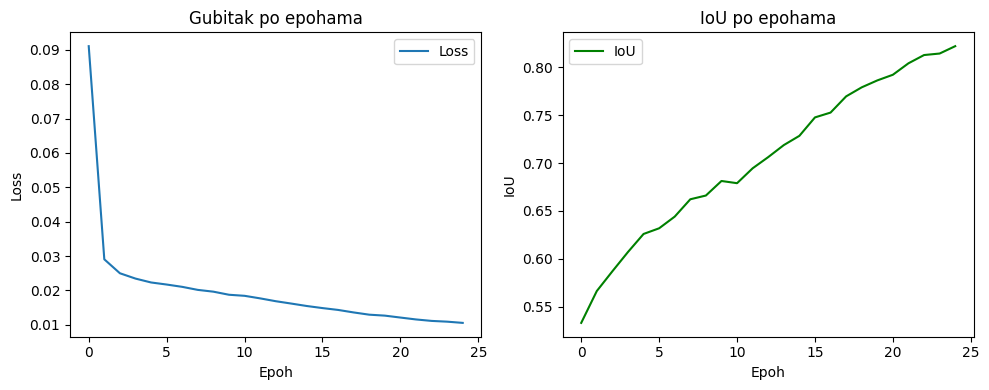

In [23]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(losses, label='Loss')
plt.title("Gubitak po epohama")
plt.xlabel("Epoh")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(ious, label='IoU', color='green')
plt.title("IoU po epohama")
plt.xlabel("Epoh")
plt.ylabel("IoU")
plt.legend()

plt.tight_layout()
plt.show()


Ovaj deo učitava jedan batch slika i maski iz train_loader i prebacuje ih na odgovarajući uređaj (CPU ili GPU). Bez računanja gradijenata (torch.no_grad()), prolazi se kroz model da bi se dobile predikcije. Predikcije se zatim binarizuju na osnovu praga 0.

In [24]:
images, masks = next(iter(train_loader))
images, masks = images.to(device), masks.to(device)

with torch.no_grad():
    outputs = model(images)
    preds = (outputs > 0).float()

Ova funkcija računa Intersection over Union (IoU), koja meri koliko se segmentacija modela poklapa sa stvarnom maskom. Ulazi su outputs (predikcije modela) i labels (prave maske). Prvo se pretvaraju u logičke vrednosti, zatim se računa presek i unija piksela, i konačno izračunava odnos preseka i unije sa malom korekcijom da se izbegne deljenje nulom. Vraća se prosečna IoU vrednost za ceo batch.

In [25]:
def iou_score_mean(outputs, labels):
    A = labels.bool()
    B = (outputs > 0).bool()
    intersection = (A & B).float().sum(dim=(2,3))
    union = (A | B).float().sum(dim=(2,3))
    iou = (intersection + 1e-6) / (union + 1e-6)
    return iou.mean()

Ovaj deo prikazuje slike iz batch-a zajedno sa njihovim pravim maskama i predikcijama modela. Slike se prikazuju u mreži sa 4 kolone. Na svakoj slici su originalna slika u sivim tonovima, maska preko nje u zelenoj nijansi i predikcija u narandzastoj, uz oznaku IoU vrednosti u naslovu. Prazni subplotovi se sakrivaju radi urednijeg prikaza.

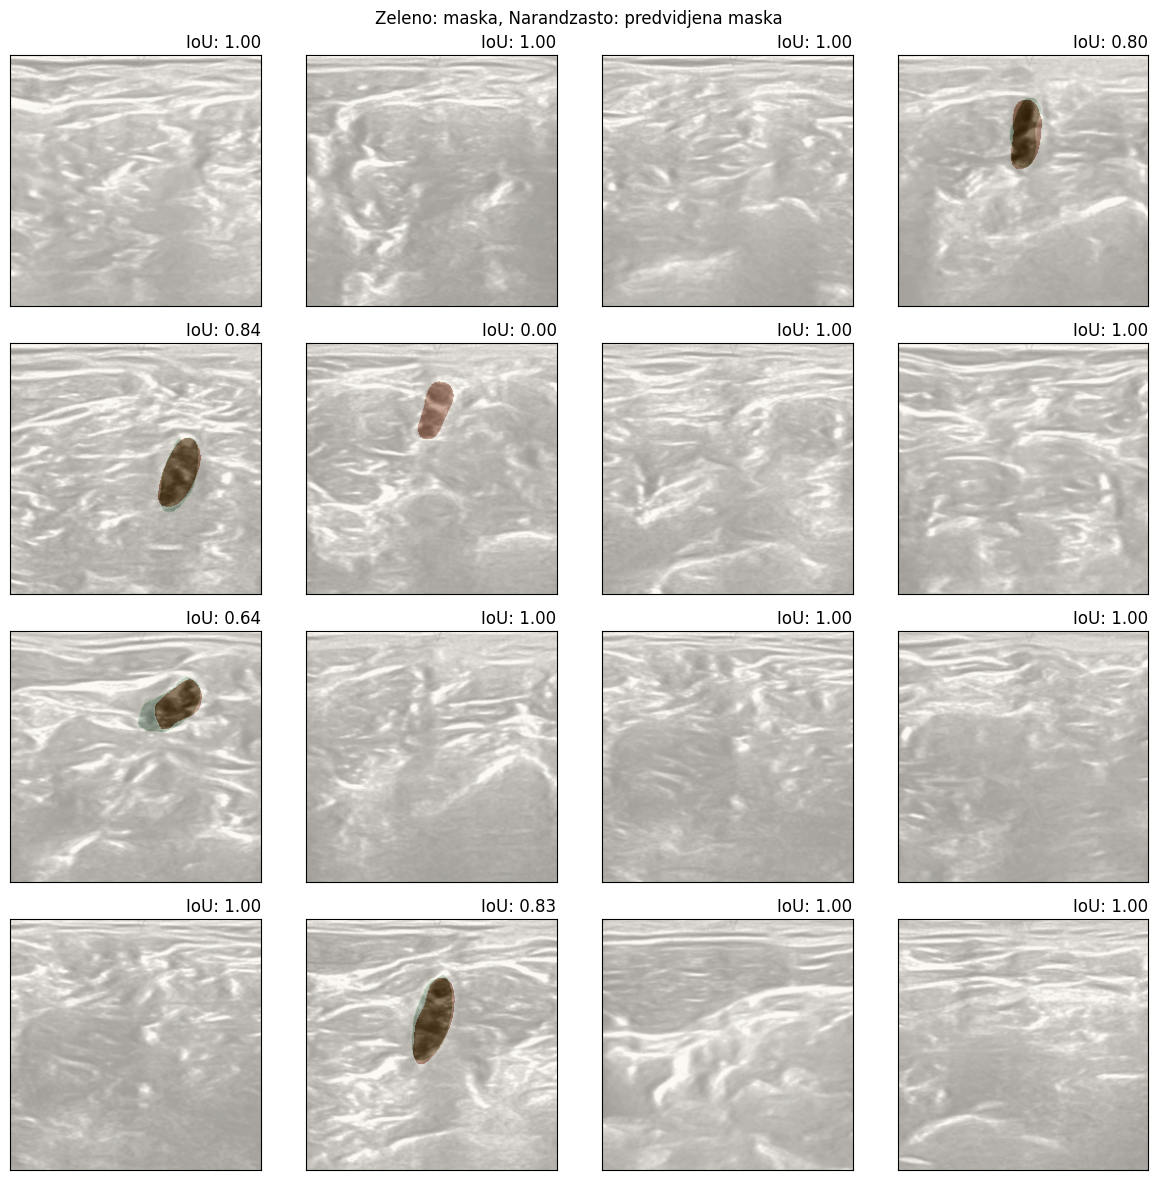

In [26]:
n = len(images)
cols = 4
rows = (n + cols - 1) // cols
fig, axs = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))

for i in range(n):
    img = images[i].cpu().squeeze()
    mask = masks[i].cpu().squeeze()
    pred = preds[i].cpu().squeeze()

    iou = iou_score_mean(preds[i:i+1], masks[i:i+1]).item()

    ax = axs[i // cols, i % cols]
    ax.imshow(img, cmap="gray")
    ax.imshow(mask, cmap="Greens", alpha=0.4)
    ax.imshow(pred, cmap="Oranges", alpha=0.4)
    ax.set_title(f"IoU: {iou:.2f}", loc='right')
    ax.set_xticks([])
    ax.set_yticks([])

for j in range(n, rows * cols):
    axs[j // cols, j % cols].axis('off')

plt.suptitle("Zeleno: maska, Narandzasto: predvidjena maska")
plt.tight_layout()
plt.show()

